In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx
from gensim.models import Word2Vec
import gensim
import numpy as np

In [2]:
df1 = pd.read_csv("scaled_combo_features.csv")

In [3]:
df1

,fk_grade_level_TA,arousal..ANEW._TA,dominance..ANEW._TA,valence..ANEW._TA,concreteness_TA,familiarity_TA,emotionality_TA,extremity_TA,valence..EL._TA,SENT_TA,...,Apology,Truth.Intensifier,Affirmation,Adverb.Limiter,Conjunction.Start,num_ratings,mturk_rating,apology,Brand,Label
0,-0.102348,0.236255,-0.449482,-0.270067,-0.048619,-0.213981,-0.245553,0.208970,-0.152049,1.158130,...,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,3,20.333333,True,Marriot,1
1,1.996280,-2.096391,-1.892456,-1.995635,-0.673987,-0.445584,0.017646,1.125400,1.034104,0.265167,...,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590,3,-14.000000,False,Marriot,0
2,-0.326828,-0.817639,-1.014791,-0.972723,-1.041318,-2.005196,0.161258,0.152088,0.548454,1.254169,...,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,4,27.500000,True,Marriot,1
3,-0.164994,0.448802,0.192798,-0.122658,0.077128,0.058662,-0.119180,0.177369,0.150165,0.530398,...,1.650154,-0.208046,-0.157909,-0.284724,-0.390590,4,30.000000,True,Marriot,1
4,0.283967,-0.356943,-0.514192,-0.570311,-0.585222,0.622655,-2.591543,-2.180069,-2.365444,-1.367783,...,1.650154,-0.208046,-0.157909,-0.284724,-0.390590,4,23.750000,True,Marriot,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.163896,-0.437463,-0.126961,0.194413,-0.006054,-0.242194,-0.031763,0.929474,0.946136,0.168235,...,-1.022993,-0.208046,-0.157909,-0.284724,-0.390590,6,28.333333,True,Al Bahar,1
776,4.032262,0.180420,0.382369,0.363857,0.626145,0.740951,0.006362,0.174604,-0.069046,-0.811428,...,0.313581,-0.208046,-0.157909,5.799783,4.603844,7,10.857143,True,enVision,1
777,-0.264182,-0.123105,-0.395721,-0.624033,0.615252,-0.842475,0.139269,0.057285,-1.454547,-0.126403,...,0.313581,-0.208046,-0.157909,-0.284724,-0.390590,11,26.272727,True,enVision,1
778,-0.201537,-0.754977,-1.145291,-1.338336,0.284510,0.013399,-2.591543,-2.180069,-2.365444,-0.761686,...,1.650154,-0.208046,-0.157909,-0.284724,-0.390590,4,19.500000,True,enVision,1


In [ ]:
## lasso - logistics - label - all features

In [6]:
df_top_pos = df1[df1["Label"] == 1]
df_top_neg = df1[df1["Label"] == 0]

In [7]:
from sklearn.utils import resample
neg_upsample = resample(df_top_neg,
             replace=True,
             n_samples=len(df_top_pos),
             random_state=42)

print(neg_upsample.shape)

(519, 182)


In [8]:
data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X_data = data_upsampled[df1.columns[:-5]]
y_data = data_upsampled['Label']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data, stratify=y_data, #keep the same ratio
                            test_size=0.1,
                            random_state=42)

In [15]:
lgclf = LogisticRegression(random_state=42, fit_intercept = True, solver = "liblinear", penalty ="l1").fit(X_train, y_train) 

In [16]:
print(cross_val_score(lgclf, X_train, y_train, cv=10))

[0.93617021 0.92553191 0.93617021 0.92553191 0.89247312 0.91397849
 0.90322581 0.90322581 0.88172043 0.93548387]


In [17]:
print("Accuracy Score:",lgclf.score(X_test, y_test))

Accuracy Score: 0.8846153846153846


In [18]:
lgclf.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lgclf.predict(X_test))

array([[48,  4],
       [ 8, 44]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


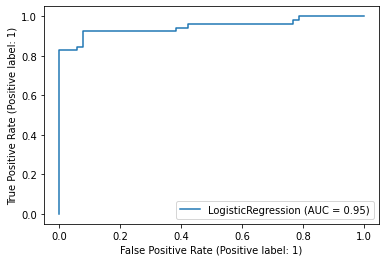

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(lgclf, X_test, y_test)
plt.show()

In [21]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(lgclf.coef_[0])
coeff_df.sort_values(by='Coefficient', inplace=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [ ]:
what are the textual features that predict apology?

In [22]:
df_feature

,Features,Coefficient
145,Negation,-1.994281
15,neg_sent_TA,-1.699340
117,risk,-0.826077
124,visual,-0.779992
80,Social,-0.707293
...,...,...
161,First.Person.Single,1.034546
60,power,1.045708
43,shehe,1.126402
53,negate,2.289414


In [23]:
#store features and associated coefficient into csv file for check
df_feature.to_csv("combo_model_feature_coefficients.csv")

In [24]:
df_feature = df_feature.set_index("Features")

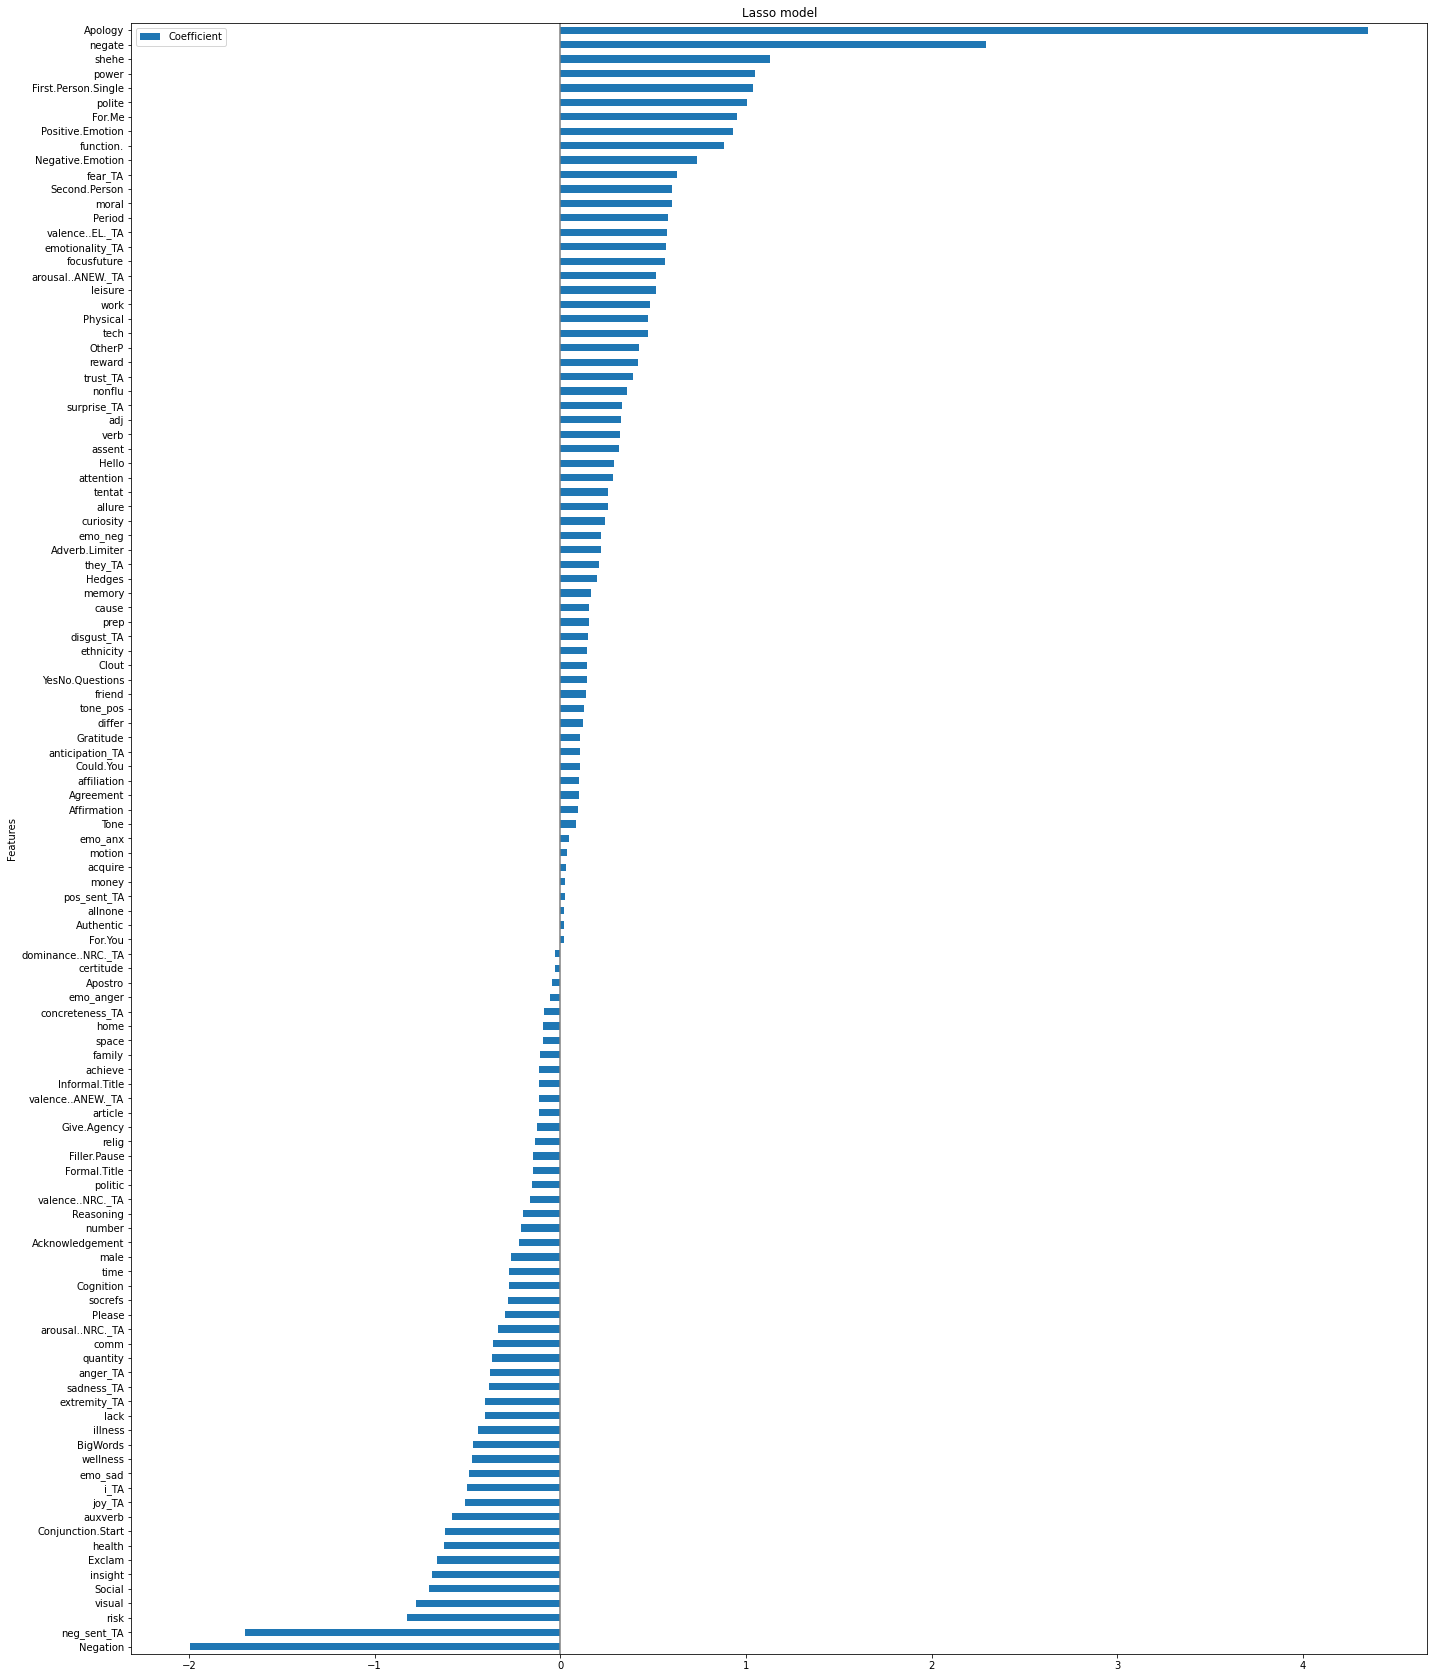

In [29]:
#visualize the feature coefficient
import matplotlib.pyplot as plt

df_feature.plot(kind='barh', figsize=(30, 30))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [ ]:
how many of features? 113 features in the combo model

In [ ]:
## Ridge - logistics - label - all features

In [30]:
rgclf = LogisticRegression(random_state=42, fit_intercept = True, penalty ="l2").fit(X_train, y_train) 

In [31]:
print(cross_val_score(rgclf, X_train, y_train, cv=10))

[0.93617021 0.92553191 0.92553191 0.91489362 0.91397849 0.91397849
 0.91397849 0.92473118 0.88172043 0.91397849]


In [32]:
print("Accuracy Score:",rgclf.score(X_test, y_test))

Accuracy Score: 0.8942307692307693


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rgclf.predict(X_test))

array([[48,  4],
       [ 7, 45]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


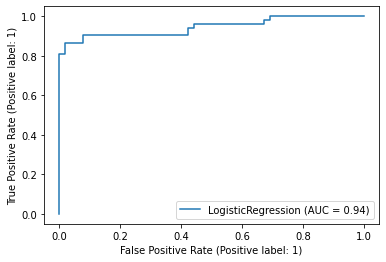

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(rgclf, X_test, y_test)
plt.show()

In [65]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(rgclf.coef_[0])
coeff_df.sort_values(by='Coefficient', inplace=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [66]:
df_feature

,Features,Coefficient
145,Negation,-1.485607
15,neg_sent_TA,-1.399052
124,visual,-0.870523
87,socrefs,-0.862439
23,i_TA,-0.846282
...,...,...
83,polite,1.086247
163,Positive.Emotion,1.098536
1,arousal..ANEW._TA,1.111801
53,negate,1.782385


In [67]:
#store features and associated coefficient into csv file for check
df_feature.to_csv("combo_model_feature_coefficients_ridge.csv")

In [68]:
df_feature = df_feature.set_index("Features")

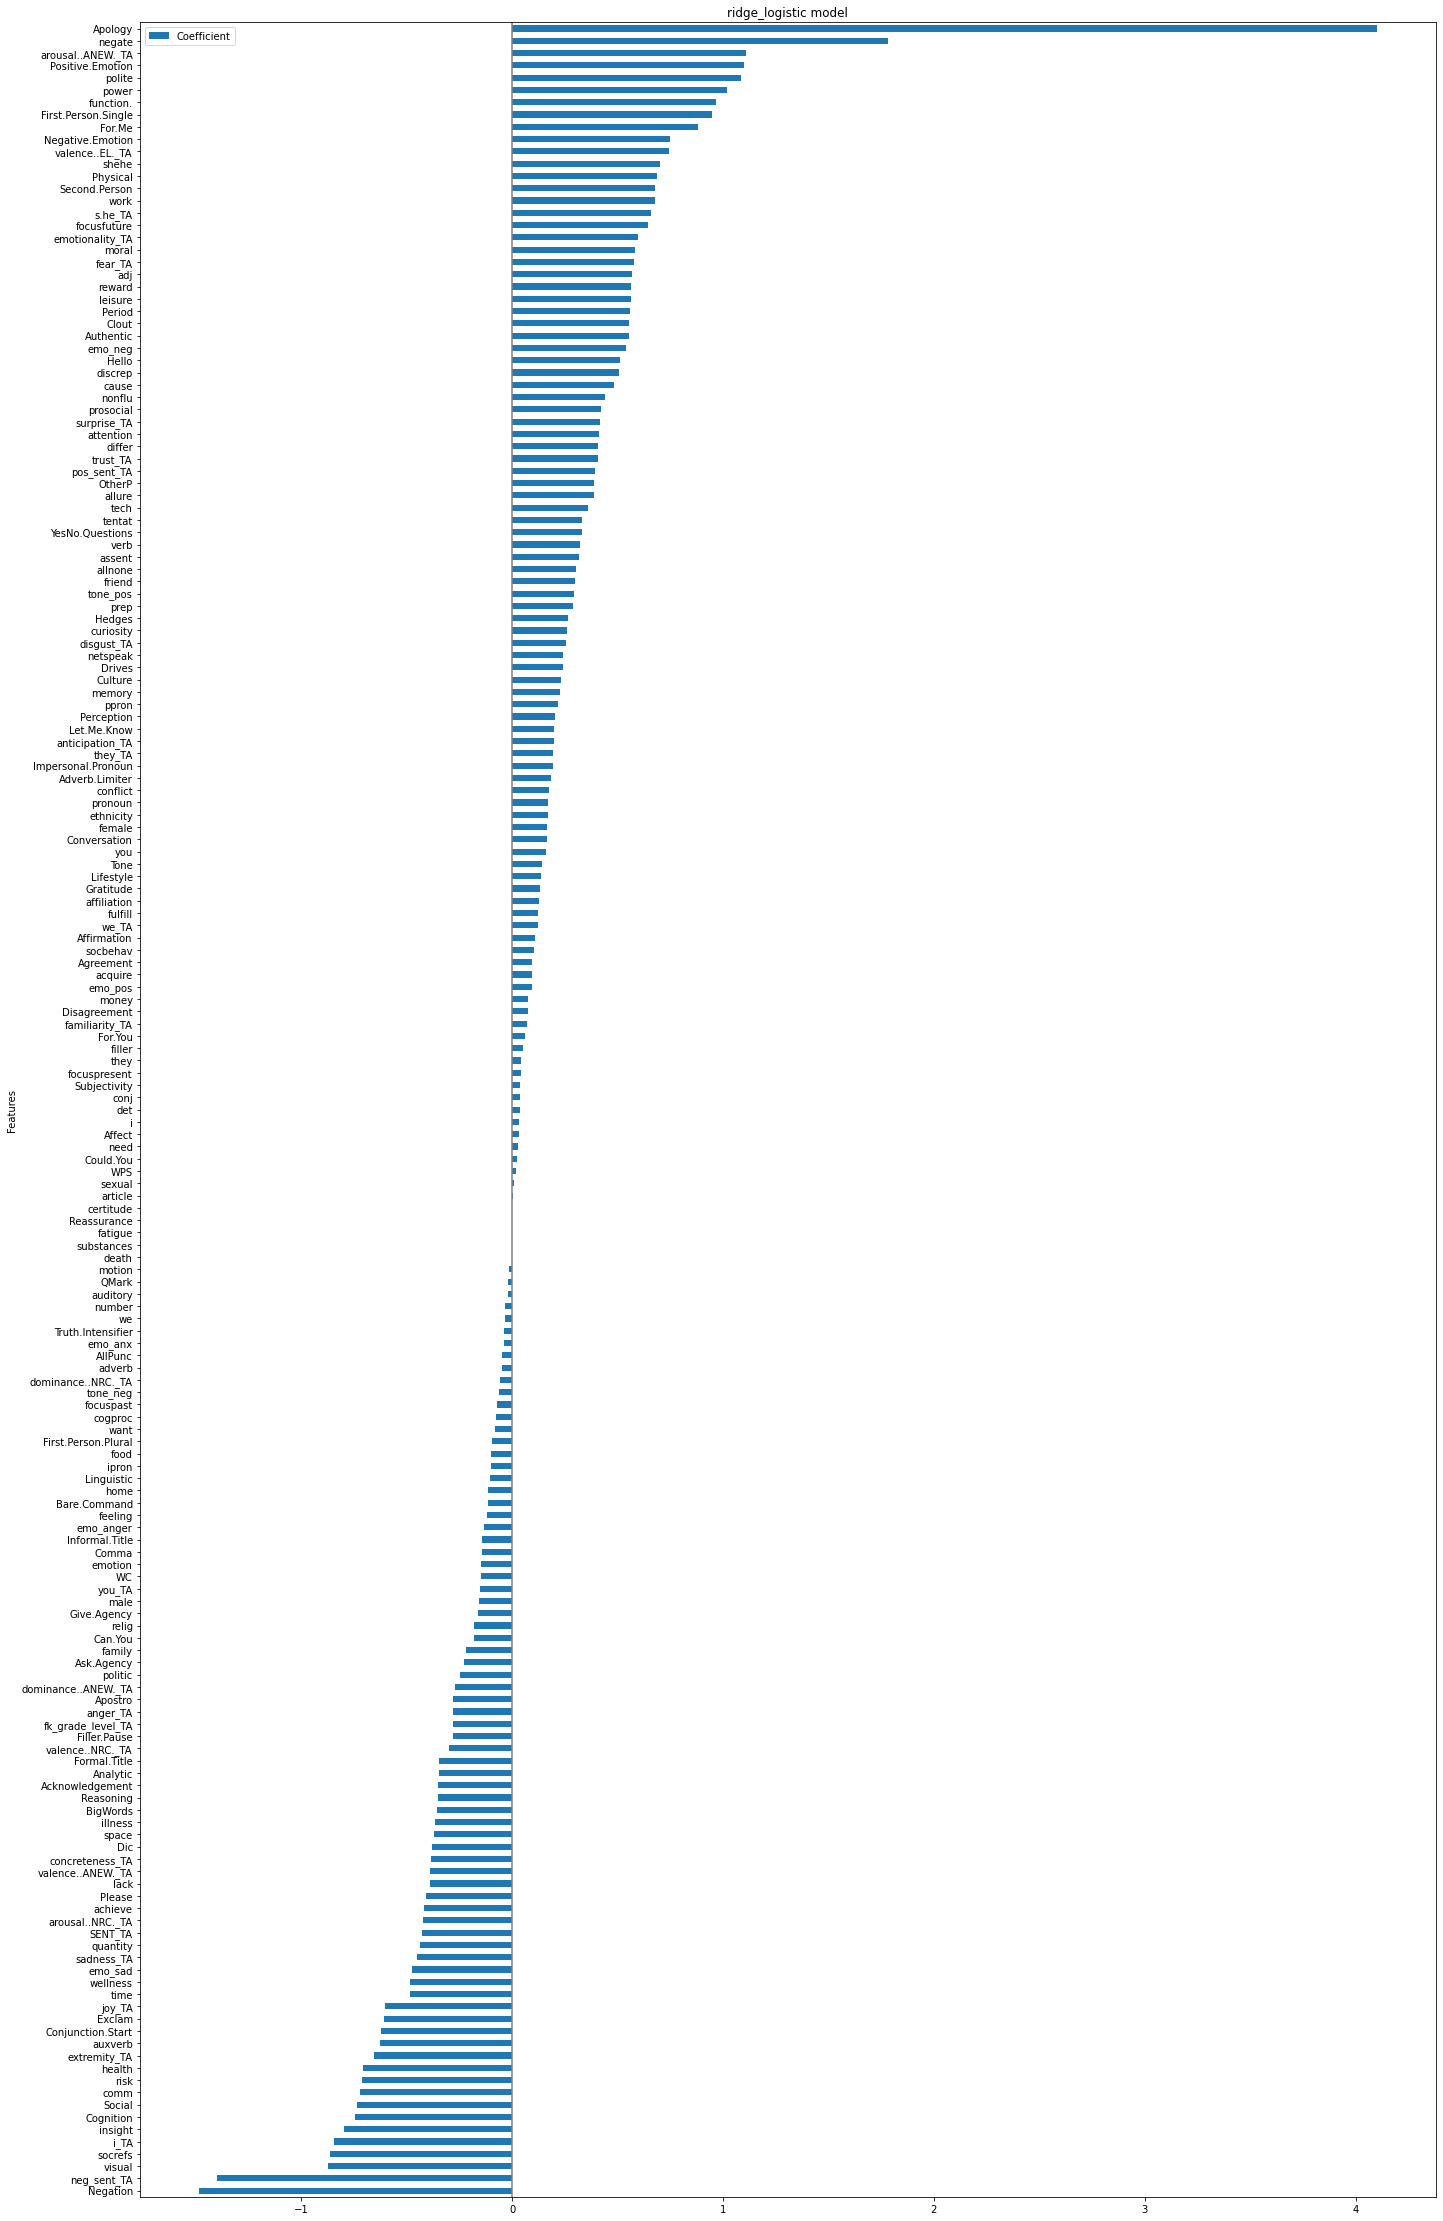

In [69]:
df_feature.plot(kind='barh', figsize=(30, 40))
plt.title('ridge_logistic model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
X_data = data_upsampled[df1.columns[:-5]]
y_data = data_upsampled['mturk_rating']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data,
                            test_size=0.1,
                            random_state=42)

In [48]:
olsclf = LinearRegression(fit_intercept = True).fit(X_train, y_train)

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, olsclf.predict(X_test))

138.76499572597385

In [50]:
olsclf.predict(X_test)

array([  8.39949181,  -5.56388587, -16.71411829,  34.91309518,
        20.84584774,  -8.02815475,  -8.4821548 ,  17.3081779 ,
       -23.48053708,   9.333478  ,  19.12647846, -10.61629449,
        31.20777318,   1.17270408, -11.12455702, -14.61520102,
        -9.08325594, -17.69992198,   0.52649612, -10.01458093,
        39.99105334,  27.80591327,  27.04407729,   5.75476117,
         3.5971906 ,  32.29007886,  20.85957965,  -7.31031745,
        -7.44246927,   4.20086429,   9.00022587,  -5.94426478,
       -10.3627575 , -16.38967569,  13.17381594,  18.16260482,
       -26.64081691,   3.74339258,   7.50000211,  -9.82206486,
         3.50794466,  14.33912693, -18.60134504, -19.78069746,
        31.20108976, -16.15234881, -25.36960003, -17.82132331,
       -10.17250656, -10.84229668, -22.07570387,  10.80904502,
         1.3731874 ,  38.40022643,  -9.86333839,  21.53412553,
       -23.2785961 , -26.6521019 , -23.56409908, -10.75001358,
        -4.63868872,  29.30766209,  14.91388183,  -4.58

In [51]:
def match():
    no_match = 0
    for i in range(len(y_test)):
        if y_test.to_list()[i] * olsclf.predict(X_test)[i] < 0:
            no_match = no_match + 1
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)
            

In [52]:
match()

0.9326923076923077


In [139]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(olsclf.predict(X_test), y_test)

(0.8496787527711929, 4.1274081641360345e-30)

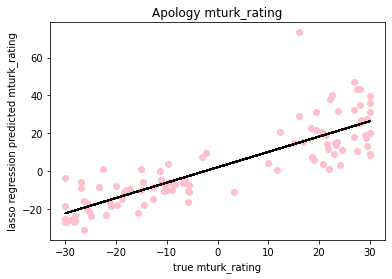

In [149]:
# Visualising the Test set results
theta = np.polyfit(y_test, olsclf.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, olsclf.predict(X_test), color = 'pink')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('ols regression predicted mturk_rating')
plt.show()

In [70]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(olsclf.coef_)
coeff_df.sort_values(by='Coefficient', inplace=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [71]:
df_feature

,Features,Coefficient
95,tech,-4.076752e+09
93,politic,-2.220246e+09
94,ethnicity,-1.103074e+09
138,Comma,-1.095287e+02
24,s.he_TA,-9.065291e+01
...,...,...
38,pronoun,2.837983e+01
72,tone_pos,5.477767e+01
43,shehe,9.107642e+01
136,AllPunc,1.759099e+02


In [72]:
#store features and associated coefficient into csv file for check
df_feature.to_csv("combo_model_feature_coefficients_ols.csv")

In [73]:
df_feature = df_feature.set_index("Features")

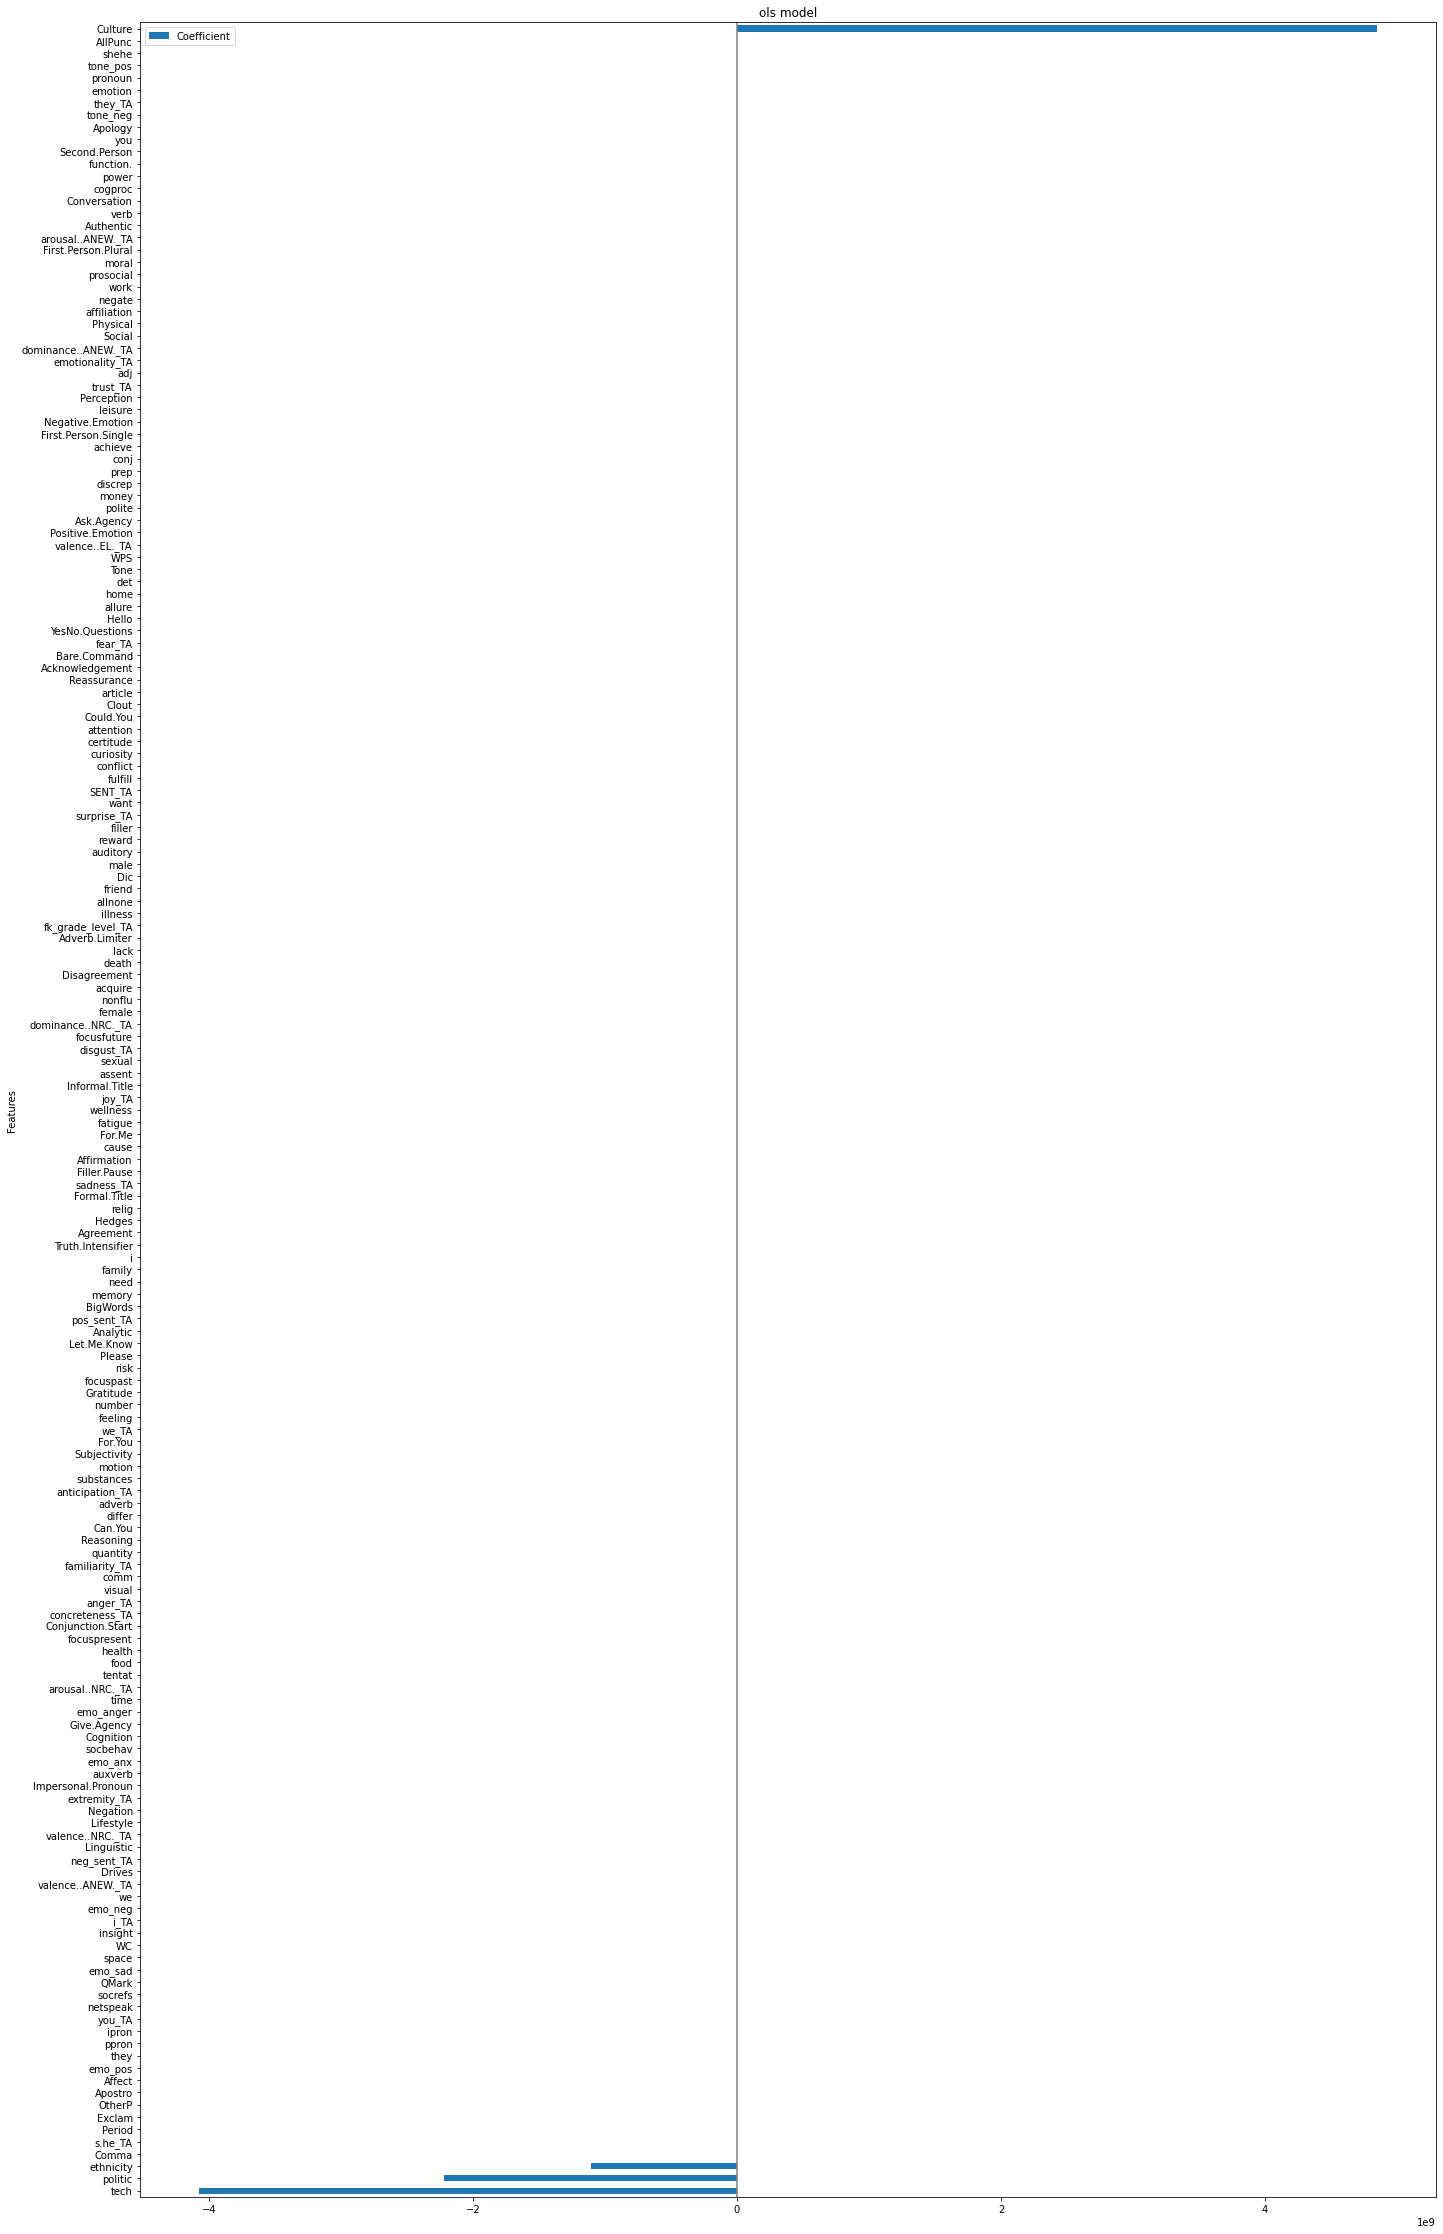

In [75]:
df_feature.plot(kind='barh', figsize=(30, 40))
plt.title('ols model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [76]:
from sklearn.linear_model import Ridge, Lasso

In [97]:
rg1 = Ridge(alpha=0.001).fit(X_train, y_train)
rg1.predict(X_test)

array([  8.91020674,  -7.36163013, -15.92379623,  35.05211811,
        20.53113689,  -9.63323665,  -9.10016734,  18.03521304,
       -23.73987181,   8.98674995,  18.88950519, -11.20697081,
        32.26692128,   1.48455386, -11.68783916, -14.54734412,
        -9.22820504, -17.8697096 ,   0.42221931, -10.68474429,
        39.97250067,  28.99687967,  28.58617911,   5.97923038,
         3.96019614,  33.18224217,  19.47431025,  -7.13325755,
        -6.56499674,   3.84390963,   8.67076705,  -6.90593821,
       -10.46908952, -15.73078944,  13.29220483,  17.70613168,
       -26.40217092,   4.40742973,   7.92639871,  -9.27147913,
         3.51514338,  14.11591297, -18.95382934, -19.3308218 ,
        30.83147148, -17.12858172, -24.66617315, -18.06162369,
       -10.80279083, -10.54588635, -22.45933353,  10.68951437,
         1.65812968,  39.76301413,  -9.34125982,  20.25311301,
       -23.15311469, -26.57598775, -23.66326727, -10.28658193,
        -4.42215843,  28.36527842,  16.13847385,  -4.75

In [98]:
mean_squared_error(y_test, rg1.predict(X_test))

135.64611981452293

In [99]:
def match():
    no_match = 0
    for i in range(len(y_test)):
        if y_test.to_list()[i] * rg1.predict(X_test)[i] < 0:
            no_match = no_match + 1
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)

In [100]:
match()

0.9423076923076923


In [140]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(rg1.predict(X_test), y_test)

(0.8533923170367957, 1.2711907450159023e-30)

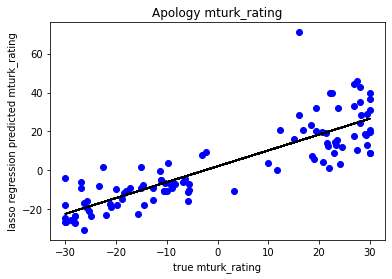

In [148]:
# Visualising the Test set results
theta = np.polyfit(y_test, rg1.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, rg1.predict(X_test), color = 'blue')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('Ridge regression predicted mturk_rating')
plt.show()

In [133]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(rg1.coef_)
coeff_df.sort_values(by='Coefficient', inplace=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [134]:
df_feature

,Features,Coefficient
24,s.he_TA,-86.948250
71,Affect,-54.529574
138,Comma,-30.792336
75,emo_pos,-25.463173
44,they,-24.870591
...,...,...
25,they_TA,24.134217
74,emotion,25.665923
136,AllPunc,48.172381
72,tone_pos,56.266316


In [135]:
#store features and associated coefficient into csv file for check
df_feature.to_csv("combo_model_feature_coefficients_ols_rg.csv")

In [136]:
df_feature = df_feature.set_index("Features")

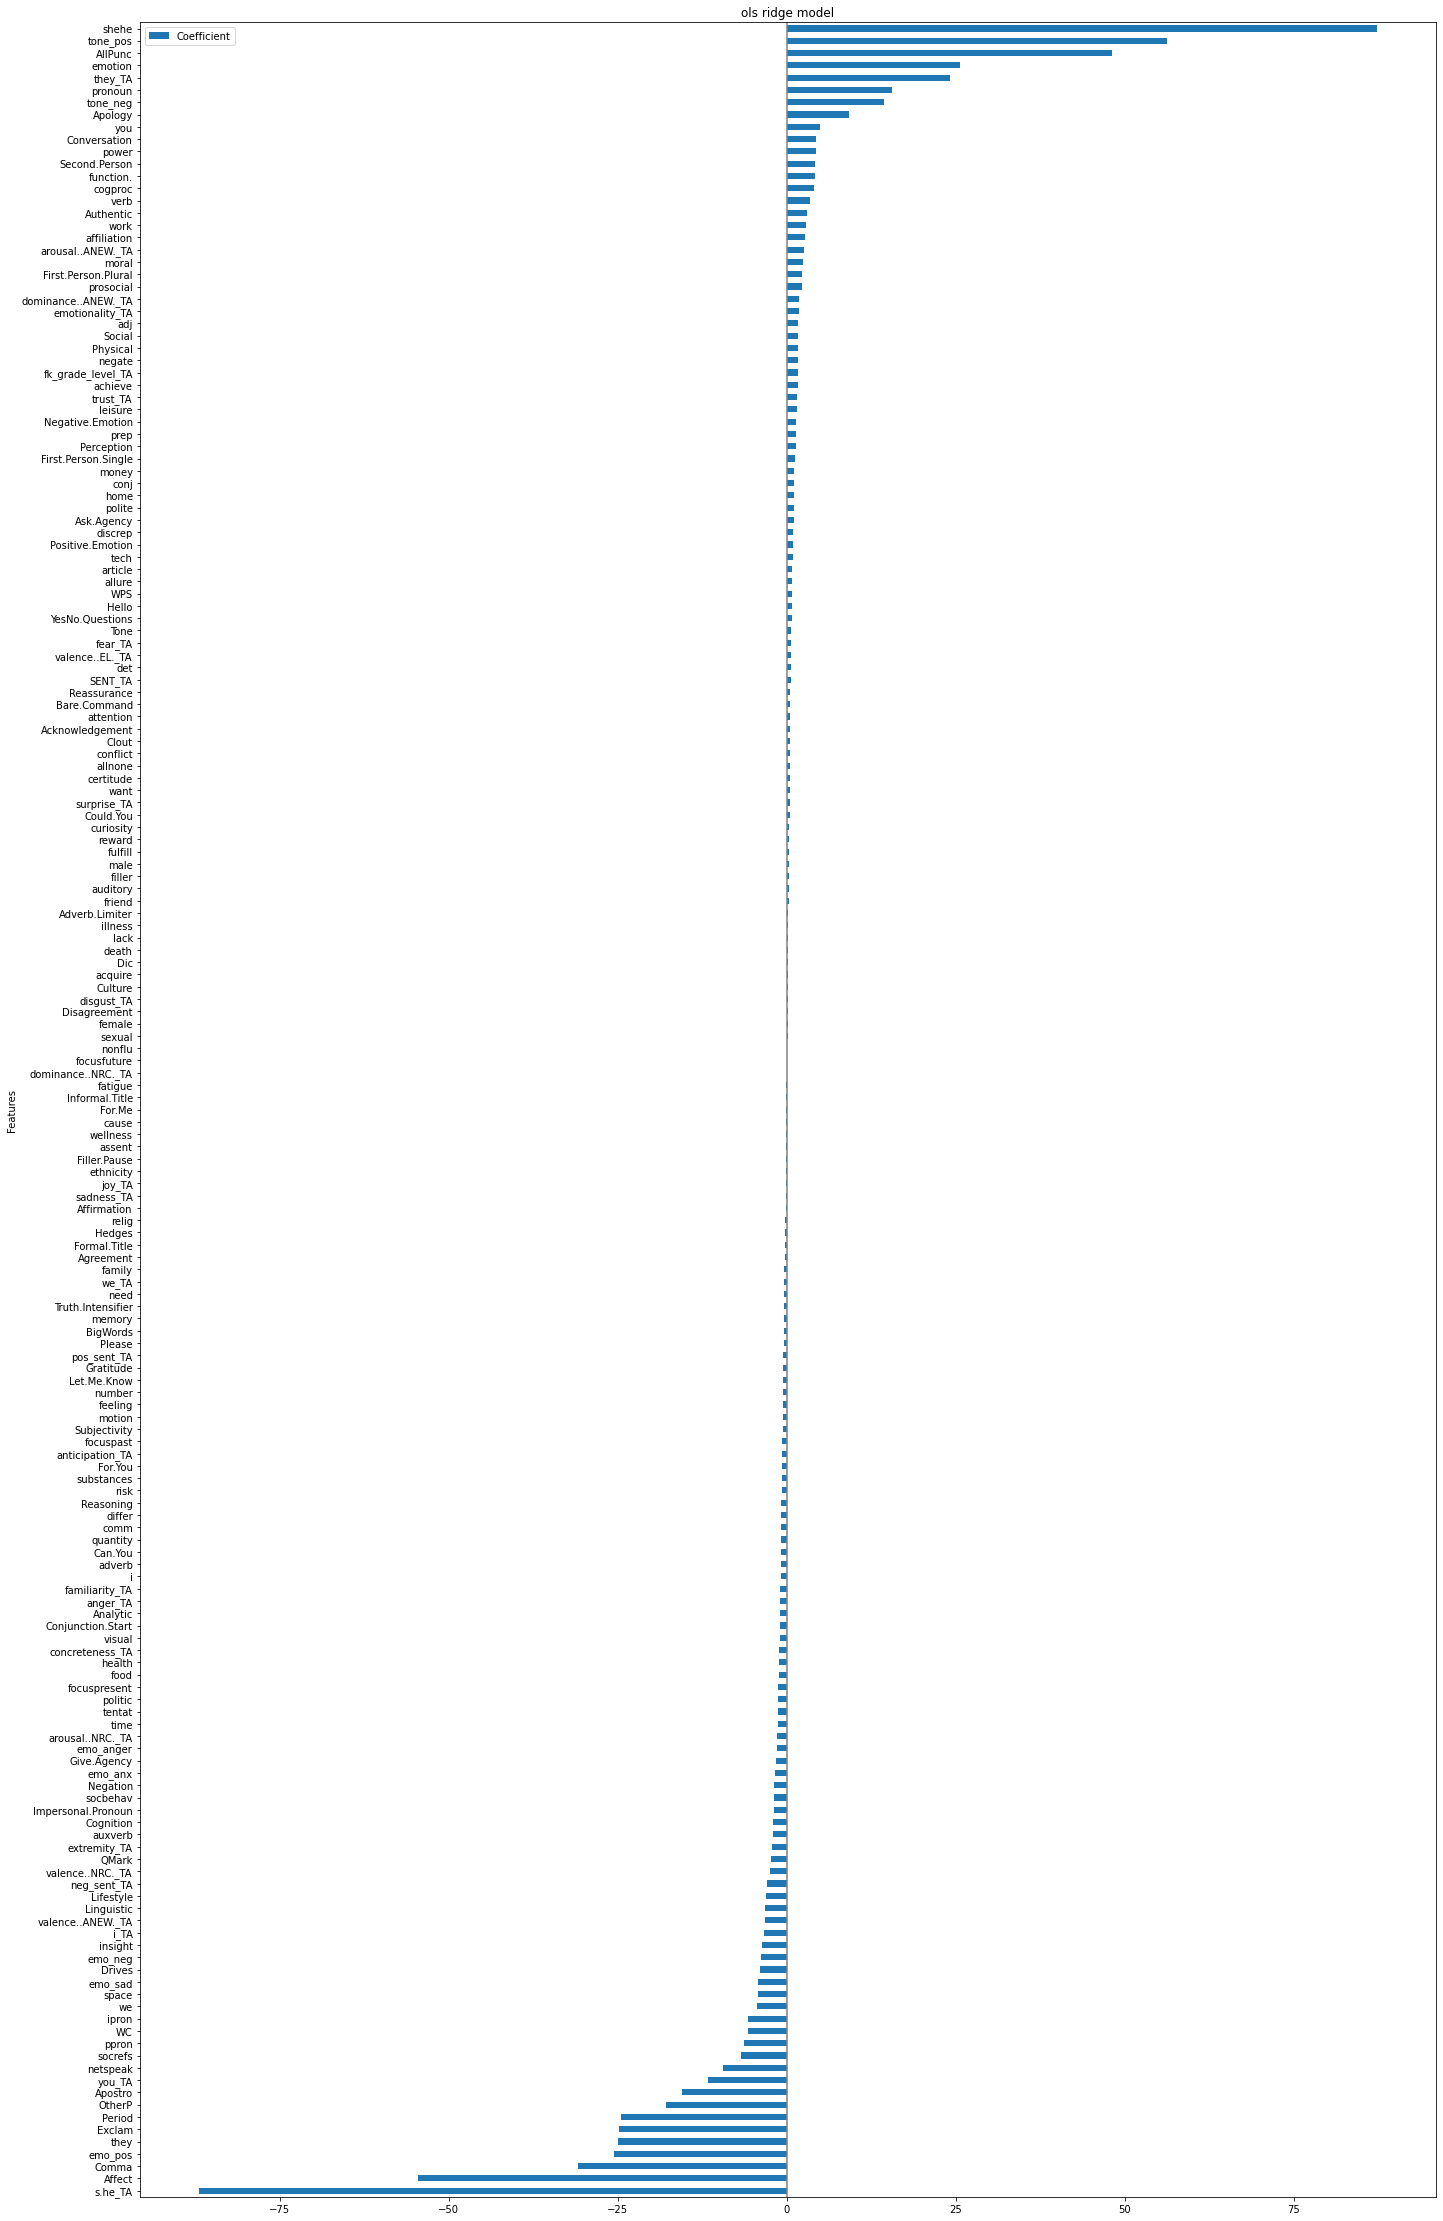

In [137]:
df_feature.plot(kind='barh', figsize=(30, 40))
plt.title('ols ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [122]:
lo1 = Lasso(alpha=0.5).fit(X_train, y_train)
lo1.predict(X_test)

array([  8.87015573,  -6.65423223, -15.68834431,  28.87902048,
        23.29319638, -17.9744494 , -10.11515209,  21.04333645,
       -18.80632333,  10.28011659,  13.05168674,  -7.17582942,
        26.47080146,  -1.11339179, -10.89380688, -13.39752523,
        -9.852032  , -11.36609847,   1.98070961, -12.72152638,
        23.33036699,  36.31048588,  30.82584907,  10.74419747,
       -10.26732958,  35.67951481,  16.04522337, -13.01191541,
        -1.53866957,   0.35549792,  17.55041343,  -5.57435123,
        -8.41377142, -17.31983483,  17.85919259,  24.00214485,
       -18.07920215,   7.92341989,  10.80161634, -10.23578887,
         4.99952968,  14.673352  , -17.23288952, -15.20779709,
        15.42981586, -15.55476708, -21.74081369, -15.29872025,
        -9.65313677,  -6.38483719, -18.67607208,   0.3014212 ,
       -13.17507936,  22.58281022,  -9.91860764,  17.26158026,
       -17.70960748, -20.08734073, -14.63620966, -11.82381989,
        -1.65743745,  13.48010892,  23.62512558,  -4.23

In [123]:
mean_squared_error(y_test, lo1.predict(X_test))

123.2716478131321

In [ ]:
# matching same direction

In [124]:
def match():
    no_match = 0
    for i in range(len(y_test)):
        if y_test.to_list()[i] * lo1.predict(X_test)[i] < 0:
            no_match = no_match + 1
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)

In [125]:
match()

0.9615384615384616


In [ ]:
#correlation between predicted y and true y

In [138]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(lo1.predict(X_test), y_test)

(0.8635357898907287, 4.286116863867899e-32)

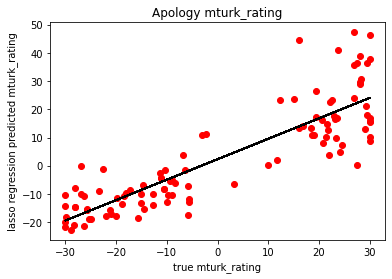

In [146]:
# Visualising the Test set results
theta = np.polyfit(y_test, lo1.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, lo1.predict(X_test), color = 'red')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('lasso regression predicted mturk_rating')
plt.show()

In [126]:
coeff_df = pd.DataFrame(X_data.columns)
coeff_df.columns = ['Features']
coeff_df["Coefficient"] = pd.Series(lo1.coef_)
coeff_df.sort_values(by='Coefficient', inplace=True)
df_f0 = coeff_df[coeff_df["Coefficient"] == 0]
df_feature = coeff_df[coeff_df["Coefficient"] != 0]

In [127]:
df_feature

,Features,Coefficient
15,neg_sent_TA,-3.230606
22,valence..NRC._TA,-1.793612
4,concreteness_TA,-1.565711
87,socrefs,-1.358379
93,politic,-1.095388
79,emo_sad,-0.692199
140,Exclam,-0.633986
176,Conjunction.Start,-0.621414
64,insight,-0.616280
103,health,-0.573968


In [128]:
#store features and associated coefficient into csv file for check
df_feature.to_csv("combo_model_feature_coefficients_ols_ls.csv")

In [129]:
df_feature = df_feature.set_index("Features")

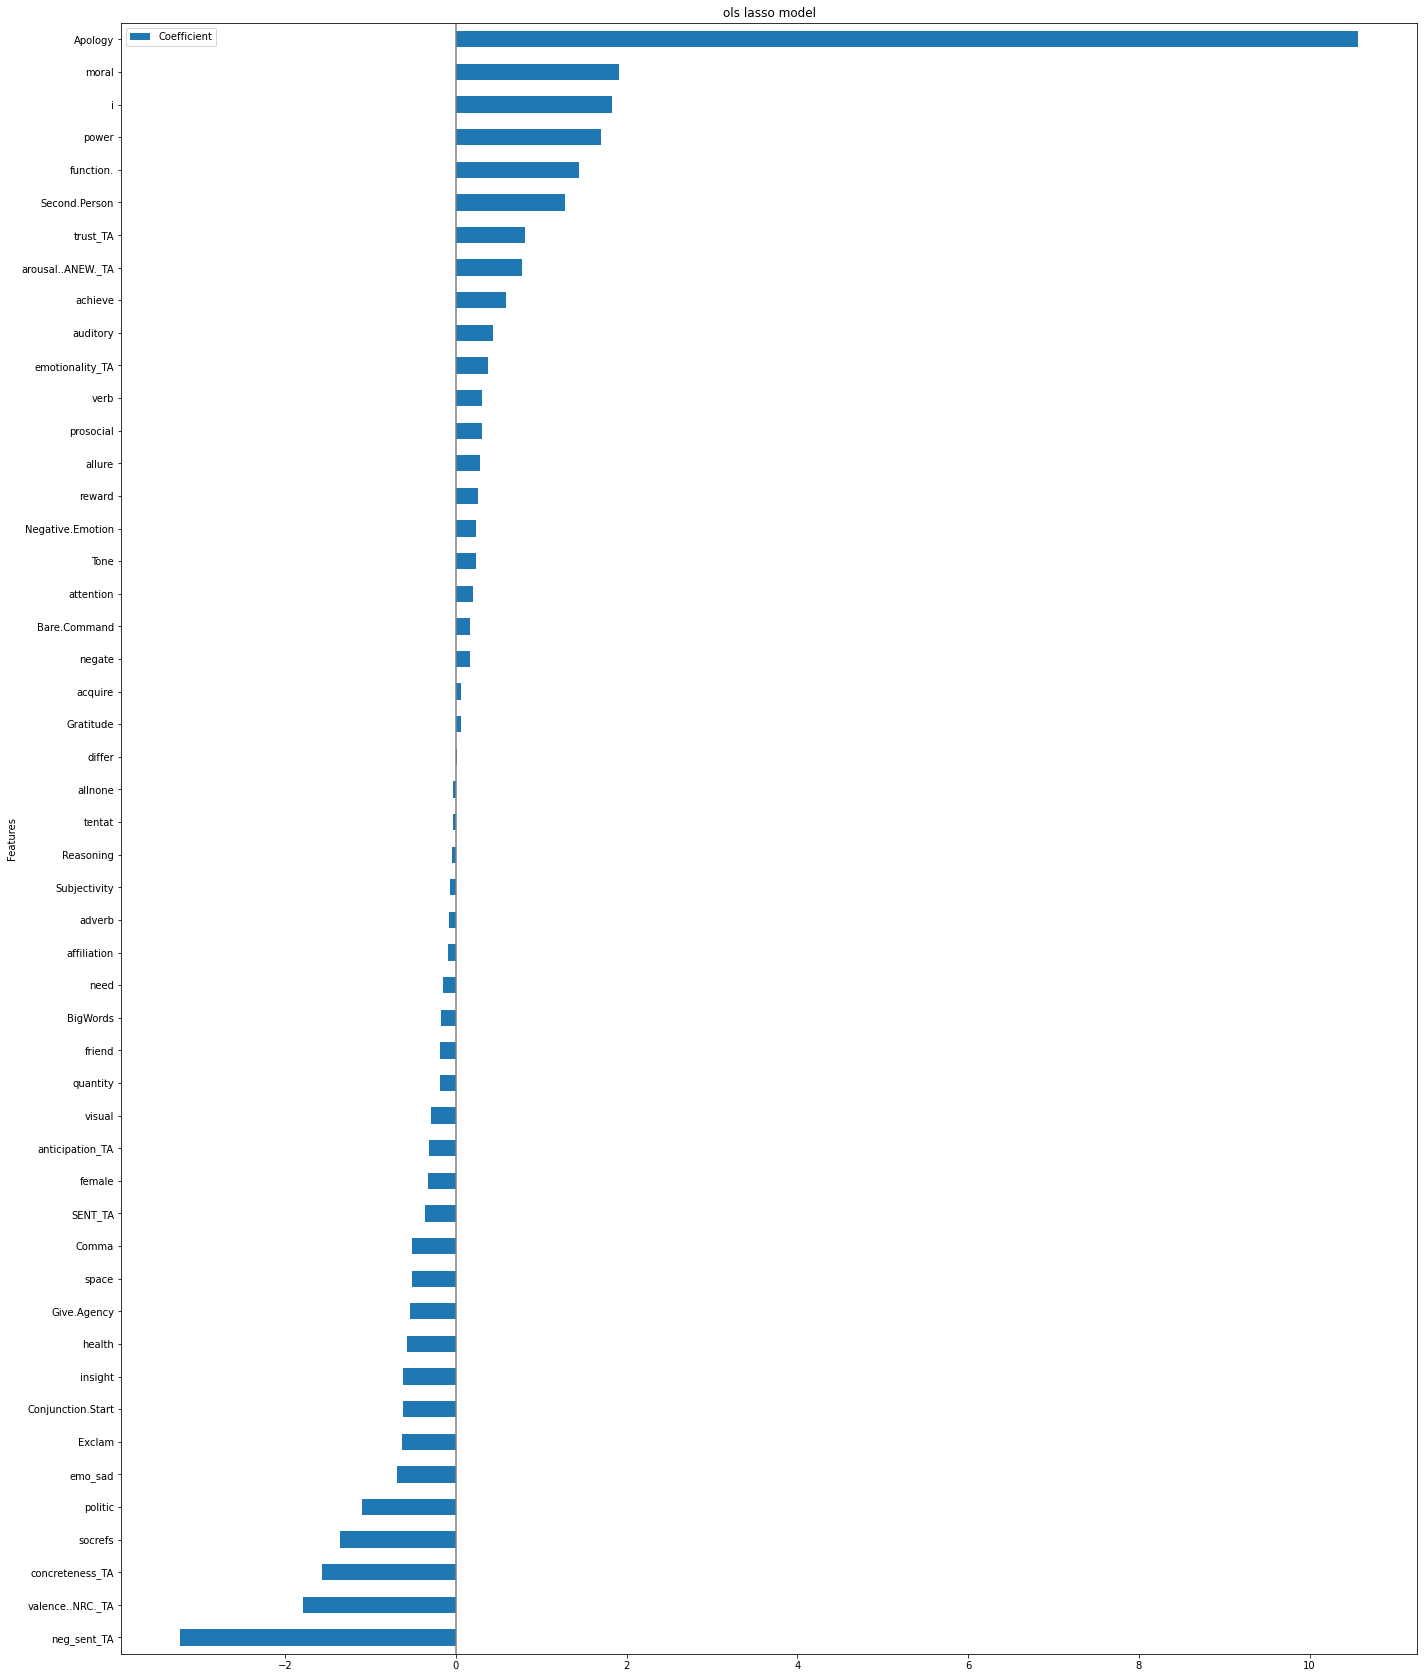

In [132]:
df_feature.plot(kind='barh', figsize=(30, 30))
plt.title('ols lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)